# Wybory 2025
## Porównanie wyników pierwszej i drugiej tury po komisjach obwodowych

© opracowanie: Patryk Czarnik, źródło danych: https://wybory.gov.pl

### Załadowanie danych

In [1]:
import pandas as pd
import numpy as np

In [2]:
katalog = '../dane/prez_2025/'

In [3]:
t1 = pd.read_csv(katalog+'protokoly_po_obwodach_utf8.csv', sep=';', encoding='UTF-8')
t2 = pd.read_csv(katalog+'protokoly_po_obwodach_w_drugiej_turze_utf8.csv', sep=';', encoding='UTF-8')

In [4]:
t1.shape

(32143, 43)

In [5]:
t2.shape

(32143, 33)

### Preprocessing danych

w celu łatwiejszej obróbki

W kolumnach z wynikami liczbowymi wstawiam zero w miejsce pustych komórek i ustalam typ liczb całkowitych…

In [6]:
for k in t1.columns[7:]:
    t1[k] = t1[k].fillna(0).astype('int64')

for k in t2.columns[9:]:
    t2[k] = t2[k].fillna(0).astype('int64')

Zastąpienie spacji typu `nbsp` w nazwach kolumn.

In [7]:
t1.rename(columns=lambda s: s.replace('\xa0', ' '), inplace=True)
t2.rename(columns=lambda s: s.replace('\xa0', ' '), inplace=True)

Usunięcie niektórych kolumn.

In [8]:
do_usuniecia_1 = [
        'Liczba kopert zwrotnych w głosowaniu korespondencyjnym, w których nie było oświadczenia o osobistym i tajnym oddaniu głosu',
        'Liczba kopert zwrotnych w głosowaniu korespondencyjnym, w których oświadczenie nie było podpisane przez wyborcę',
        'Liczba kopert zwrotnych w głosowaniu korespondencyjnym, w których nie było koperty na kartę do głosowania',
        'Liczba kopert zwrotnych w głosowaniu korespondencyjnym, w których znajdowała się niezaklejona koperta na kartę do głosowania',
        'w tym liczba kart wyjętych z kopert na kartę do głosowania w głosowaniu korespondencyjnym',
        'w tym z powodu postawienia znaku „X” wyłącznie obok nazwiska skreślonego kandydata',
]

t1.drop(columns=do_usuniecia_1, inplace=True)

In [9]:
do_usuniecia_2 = [
        'Liczba kopert zwrotnych w głosowaniu korespondencyjnym, w których nie było oświadczenia o osobistym i tajnym oddaniu głosu',
        'Liczba kopert zwrotnych w głosowaniu korespondencyjnym, w których oświadczenie nie było podpisane przez wyborcę',
        'Liczba kopert zwrotnych w głosowaniu korespondencyjnym, w których nie było koperty na kartę do głosowania',
        'Liczba kopert zwrotnych w głosowaniu korespondencyjnym, w których znajdowała się niezaklejona koperta na kartę do głosowania',
        'w tym liczba kart wyjętych z kopert na kartę do głosowania w głosowaniu korespondencyjnym',
]

t2.drop(columns=do_usuniecia_2, inplace=True)

Usuwam także te kolumny, które powtarzają się między 1 i 2 turą
*TODO: sprawdź, czy gdziekolwiek mają zmienione wartości*

In [10]:
t2.drop(columns=['Gmina', 'Powiat', 'Teryt Powiatu', 'Województwo', 'Siedziba'], inplace=True)

Skrócenie nazw kolumn z nazwiskami.

In [11]:
nazwiska1 = {pelne: pelne.split()[0].capitalize() for pelne in t1.columns[-13:]}
nazwiska2 = {pelne: pelne.split()[0].capitalize() for pelne in t2.columns[-2:]}
t1.rename(columns=nazwiska1, inplace=True)
t2.rename(columns=nazwiska2, inplace=True)

Skrócenie pozostałych nazw kolumn.

In [12]:
t1.rename(columns={
        'Liczba kart do głosowania otrzymanych przez obwodową komisję wyborczą, ustalona po ich przeliczeniu przed rozpoczęciem głosowania z uwzględnieniem ewentualnych kart otrzymanych z rezerwy': 'Kart otrzymanych',
        'Liczba wyborców uprawnionych do głosowania (umieszczonych w spisie, z uwzględnieniem dodatkowych formularzy) w chwili zakończenia głosowania': 'Uprawnionych',
        'Liczba niewykorzystanych kart do głosowania': 'Kart niewykorzystanych',
        'Liczba wyborców, którym wydano karty do głosowania w lokalu wyborczym (liczba podpisów w spisie oraz adnotacje o wydaniu karty bez potwierdzenia podpisem w spisie)': 'Kart wydanych w lokalu',
        'Liczba wyborców, którym wysłano pakiety wyborcze': 'Kopert wysłanych',
        'Liczba wyborców, którym wydano karty do głosowania w lokalu wyborczym oraz w głosowaniu korespondencyjnym (łącznie)': 'Kart wydanych',
        'Liczba wyborców głosujących przez pełnomocnika (liczba kart do głosowania wydanych na podstawie aktów pełnomocnictwa otrzymanych przez obwodową komisję wyborczą)': 'Pełnomocników',
        'Liczba wyborców głosujących na podstawie zaświadczenia o prawie do głosowania': 'Zaświadczeń',
        'Liczba otrzymanych kopert zwrotnych w głosowaniu korespondencyjnym': 'Kopert otrzymanych',
        'Liczba kopert na kartę do głosowania w głosowaniu korespondencyjnym wrzuconych do urny': 'Kopert wrzuconych',
        'Liczba kart wyjętych z urny': 'Kart wyjętych',
        'Liczba kart nieważnych (bez pieczęci obwodowej komisji wyborczej lub inne niż urzędowo ustalone)': 'Kart nieważnych',
        'Liczba kart ważnych': 'Kart ważnych',
        'Liczba głosów nieważnych (z kart ważnych)': 'Głosów nieważnych',
        'w tym z powodu postawienia znaku „X” obok nazwiska dwóch lub większej liczby kandydatów': 'Głosów nieważnych X',
        'w tym z powodu niepostawienia znaku „X” obok nazwiska żadnego kandydata': 'Głosów nieważnych Y',
        'Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów (z kart ważnych)': 'Głosów ważnych',
}, inplace=True)

In [13]:
t2.rename(columns={
        'Liczba kart do głosowania otrzymanych przez obwodową komisję wyborczą, ustalona po ich przeliczeniu przed rozpoczęciem głosowania z uwzględnieniem ewentualnych kart otrzymanych z rezerwy': 'Kart otrzymanych',
        'Liczba wyborców uprawnionych do głosowania (umieszczonych w spisie, z uwzględnieniem dodatkowych formularzy) w chwili zakończenia głosowania': 'Uprawnionych',
        'Liczba niewykorzystanych kart do głosowania': 'Kart niewykorzystanych',
        'Liczba wyborców, którym wydano karty do głosowania w lokalu wyborczym (liczba podpisów w spisie oraz adnotacje o wydaniu karty bez potwierdzenia podpisem w spisie)': 'Kart wydanych w lokalu',
        'Liczba wyborców, którym wysłano pakiety wyborcze': 'Kopert wysłanych',
        'Liczba wyborców, którym wydano karty do głosowania w lokalu wyborczym oraz w głosowaniu korespondencyjnym (łącznie)': 'Kart wydanych',
        'Liczba wyborców głosujących przez pełnomocnika (liczba kart do głosowania wydanych na podstawie aktów pełnomocnictwa otrzymanych przez obwodową komisję wyborczą)': 'Pełnomocników',
        'Liczba wyborców głosujących na podstawie zaświadczenia o prawie do głosowania': 'Zaświadczeń',
        'Liczba otrzymanych kopert zwrotnych w głosowaniu korespondencyjnym': 'Kopert otrzymanych',
        'Liczba kopert na kartę do głosowania w głosowaniu korespondencyjnym wrzuconych do urny': 'Kopert wrzuconych',
        'Liczba kart wyjętych z urny': 'Kart wyjętych',
        'Liczba kart nieważnych (bez pieczęci obwodowej komisji wyborczej lub inne niż urzędowo ustalone)': 'Kart nieważnych',
        'Liczba kart ważnych': 'Kart ważnych',
        'Liczba głosów nieważnych (z kart ważnych)': 'Głosów nieważnych',
        'w tym z powodu postawienia znaku „X” obok nazwisk obu kandydatów': 'Głosów nieważnych X',
        'w tym z powodu niepostawienia znaku „X” obok nazwiska żadnego kandydata': 'Głosów nieważnych Y',
        'Liczba głosów ważnych oddanych łącznie na obu kandydatów (z kart ważnych)': 'Głosów ważnych',
}, inplace=True)

Dla komisji z siedzibą w kraju unikalną parę wartości stanowią `(Teryt Gminy, Nr komisji)`
Komisje zagraniczne nie posiadają atrybutu `Teryt Gminy`, ale posiadają unikalny `Nr komisji`.

Dla ujednolicenia dostępu do danych komisjom zagranicznym przypisuję `Teryt Gminy` równy 0 (żadna gmina nie ma takiego).

In [14]:
len(t1[t1['Teryt Gminy'] == 0])

0

In [15]:
t1['Teryt Gminy'] = t1['Teryt Gminy'].fillna(0).astype('int64')
t2['Teryt Gminy'] = t2['Teryt Gminy'].fillna(0).astype('int64')

Upewniam się, że żaden rekord nie zawiera zduplikowanych identyfikatorów.

In [16]:
(len(t1), len(t1[['Nr komisji', 'Teryt Gminy']].drop_duplicates()),
 len(t2), len(t2[['Nr komisji', 'Teryt Gminy']].drop_duplicates()))

(32143, 32143, 32143, 32143)

### Sumaryczne wyniki

Celem weryfikacji danych

In [17]:
t1.iloc[:, -13:].sum()

Bartoszewicz      95636
Biejat           829345
Braun           1242892
Hołownia         978893
Jakubiak         150696
Maciak            36371
Mentzen         2902287
Nawrocki        5790762
Senyszyn         214195
Stanowski        243467
Trzaskowski     6147743
Woch              18338
Zandberg         952821
dtype: int64

In [18]:
t2.iloc[:, -2:].sum()

Nawrocki       10606628
Trzaskowski    10237177
dtype: int64

### Dodatkowe kolumny

Wyniki procentowo per obwód.

In [19]:
for n in nazwiska1.values():
    t1[f'Proc {n}'] = t1[n] / t1['Głosów ważnych']

for n in nazwiska2.values():
    t2[f'Proc {n}'] = t2[n] / t2['Głosów ważnych']

### Złączenie danych do jednej tabeli

In [20]:
t = t1.merge(t2, how='inner', on=['Teryt Gminy', 'Nr komisji'], suffixes=[' t1', ' t2'])

In [21]:
t.shape

(32143, 73)

Przykładowy rekord:

In [22]:
t.iloc[1].to_dict()

{'Nr komisji': 2,
 'Gmina': 'm. Bolesławiec',
 'Teryt Gminy': 20101,
 'Powiat': 'bolesławiecki',
 'Teryt Powiatu': 20100.0,
 'Województwo': 'dolnośląskie',
 'Siedziba': 'Szkoła Podstawowa Nr 3, ul. Ceramiczna 5, 59-700 Bolesławiec',
 'Kart otrzymanych t1': 1295,
 'Uprawnionych t1': 1293,
 'Kart niewykorzystanych t1': 414,
 'Kart wydanych w lokalu t1': 881,
 'Kopert wysłanych t1': 1,
 'Kart wydanych t1': 882,
 'Pełnomocników t1': 1,
 'Zaświadczeń t1': 7,
 'Kopert otrzymanych t1': 1,
 'Kopert wrzuconych t1': 1,
 'Kart wyjętych t1': 882,
 'Kart nieważnych t1': 0,
 'Kart ważnych t1': 882,
 'Głosów nieważnych t1': 2,
 'Głosów nieważnych X t1': 1,
 'Głosów nieważnych Y t1': 1,
 'Głosów ważnych t1': 880,
 'Bartoszewicz': 6,
 'Biejat': 29,
 'Braun': 37,
 'Hołownia': 29,
 'Jakubiak': 5,
 'Maciak': 2,
 'Mentzen': 113,
 'Nawrocki t1': 228,
 'Senyszyn': 9,
 'Stanowski': 13,
 'Trzaskowski t1': 381,
 'Woch': 1,
 'Zandberg': 27,
 'Proc Bartoszewicz': 0.006818181818181818,
 'Proc Biejat': 0.0329545454

## Poszukiwania nietypowych sytuacji

### Obliczenie różnic

In [23]:
t["Różn Nawrocki"] = t["Nawrocki t2"] - t["Nawrocki t1"]
t["Różn Trzaskowski"] = t["Trzaskowski t2"] - t["Trzaskowski t1"]


In [24]:
t["Różn Proc Nawrocki"] = t["Proc Nawrocki t2"] - t["Proc Nawrocki t1"]
t["Różn Proc Trzaskowski"] = t["Proc Trzaskowski t2"] - t["Proc Trzaskowski t1"]

Łączę głosy z pierwszej tury w dwa bloki nazwane umownie *Lewica* i *Prawica* (wybaczcie kandydaci i ich zwolennicy; wybaczcie wszyscy „prawdziwi” lewacy i prawacy, to tylko nawa robocza) w zależności od tego, czy przepływ elektoratu przewidujemy bardziej do RT, czy KN.

In [25]:
t["Lewica t1"] = t["Trzaskowski t1"] + t["Biejat"] + t["Hołownia"] + t["Senyszyn"] + t["Zandberg"]
t["Prawica t1"] = t["Nawrocki t1"] + t["Bartoszewicz"] + t["Braun"] + t["Jakubiak"] + t["Maciak"] + t["Mentzen"]+ t["Stanowski"]+ t["Woch"]

In [26]:
t["Proc Lewica t1"] = t["Lewica t1"] / t['Głosów ważnych t1']
t["Proc Prawica t1"] = t["Prawica t1"] / t['Głosów ważnych t1']

In [27]:
t["Różn Lewica"] = t["Trzaskowski t2"] - t["Lewica t1"]
t["Różn Prawica"] = t["Nawrocki t2"] - t["Prawica t1"]

In [28]:
t["Różn Proc Lewica"] = t["Proc Trzaskowski t2"] - t["Proc Lewica t1"]
t["Różn Proc Prawica"] = t["Proc Nawrocki t2"] - t["Proc Prawica t1"]

### W drugiej turze kandydat zdobywa mniejszą bezwzględną liczbę głosów niż w pierwszej

In [29]:
rt_mniej = t[t["Różn Trzaskowski"] < 0].sort_values("Różn Trzaskowski")
kn_mniej = t[t["Różn Nawrocki"] < 0].sort_values("Różn Nawrocki")

In [30]:
len(rt_mniej), len(kn_mniej)

(130, 114)

Jest 130 takich komisji w przypadku RT i 114 w przypadku KN.

Suma tych „przepływów”:

In [31]:
print(kn_mniej["Różn Nawrocki"].sum())

-508


In [32]:
print(rt_mniej["Różn Trzaskowski"].sum())

-482


Zobaczmy, jakiego typu są to komisje.

In [33]:
list(kn_mniej["Siedziba"])

['Szkoła Podstawowa w Magnuszewie, ul. Bohaterów Września 10, 26-910 Magnuszew',
 'Cassino, Via Marconi, Aula Pacis, 03043 Cassino, Cassino, Republika Włoska',
 'Szkoła Podstawowa nr 160 im. Powstańców Śląskich, ul. Andrzeja Struga 24A, 90-513 Łódź',
 'Samodzielny Publiczny Zakład Opieki Zdrowotnej Sanatorium Uzdrowiskowe Ministerstwa Spraw Wewnętrznych i Administracji ”ORION” w Ciechocinku, ul. Warzelniana 1, 87-720 Ciechocinek',
 '21 Wojskowy Szpital Uzdrowiskowo-Rehabilitacyjny SP ZOZ w Busku-Zdroju, ul. Feliksa Rzewuskiego 8, 28-100 Busko-Zdrój',
 'Publiczna Szkoła Podstawowa nr 2 im. Ignacego Jana Paderewskiego w Staszowie, ul. Niepodległości 4, 28-200 Staszów',
 'Urząd Miejski (sala konferencyjna), ul. Marszałka Józefa Piłsudskiego 22, 23-100 Bychawa',
 'Dom Pomocy Społecznej "Biały Potok" w Trzemeśni, Trzemeśnia 377, 32-425 Trzemeśnia',
 'Wojskowy Instytut Medyczny Państwowy Instytut Badawczy, ul. Zegrzyńska 8, 05-119 Legionowo',
 'Szpital Powiatowy w Myszkowie, ul. Aleja Wolnoś

In [34]:
list(rt_mniej["Siedziba"])

['Przedszkole Publiczne nr 10, ul. Adama Asnyka 6, 47-100 Strzelce Opolskie',
 'Gminny Ośrodek Kultury, Sportu i Rekreacji w Biszczy, Biszcza 50, 23-425 Biszcza',
 'Publiczna Szkoła Podstawowa Nr 3, klasa nr 3, ul. Ignacego Krasickiego 25, 46-300 Olesno',
 '21 Wojskowy Szpital Uzdrowiskowo-Rehabilitacyjny SP ZOZ w Busku-Zdroju, ul. Feliksa Rzewuskiego 8, 28-100 Busko-Zdrój',
 'Zespół Placówek Młodzieżowych "Bursa", ul. gen. Józefa Hallera 37, 86-300 Grudziądz',
 'Biblioteka - Ośrodek Kultury Gminy Sadowie, Sadowie 90A, 27-580 Sadowie',
 'Zespół Szkolno-Przedszkolny Nr 14, ul. Stawowa 179, 31-346 Kraków',
 'Szpital Medicover, al. Aleja Rzeczypospolitej 5, 02-972 Warszawa',
 'Wojewódzki Szpital Obserwacyjno-Zakaźny im. Tadeusza Browicza w Bydgoszczy, ul. Św. Floriana 12, 85-030 Bydgoszcz',
 'Wojewódzki Szpital Chorób Płuc w Wodzisławiu Śląskim, ul. Bracka 13, 44-300 Wodzisław Śląski',
 'Małopolski Szpital Rehabilitacyjny w Krzeszowicach, ul. I. Daszyńskiego 1, 32-065 Krzeszowice',
 'Szpi

Jak widać, **w obu przypadkach** dominują obwody w szpitalach i zakładach opieki. Liczba głosów w takich miejscach nie jest zwykle duża i faktycznie może zmienić się o kilka między turami, zaraz to sprawdzimy.  
Spróbujmy jednocześnie wyłapać te obwody, gdzie bezwględna różnica głosów była największa – zrobimy zestawienie posortowane wg różnicy.

In [35]:
rt_mniej.head(20)[["Nr komisji", "Gmina", "Województwo", "Siedziba",
                   "Nawrocki t1", "Nawrocki t2", "Różn Nawrocki",
                   "Trzaskowski t1", "Trzaskowski t2", "Różn Trzaskowski"]]

Nr komisji                  Gmina         Województwo  \
17548           9  gm. Strzelce Opolskie            opolskie   
4466            2            gm. Biszcza           lubelskie   
17247           3             gm. Olesno            opolskie   
25341          34        gm. Busko-Zdrój      świętokrzyskie   
4069           25           m. Grudziądz  kujawsko-pomorskie   
25936           1            gm. Sadowie      świętokrzyskie   
11610          95              m. Kraków         małopolskie   
16018        1137                Wilanów         mazowieckie   
4034          198           m. Bydgoszcz  kujawsko-pomorskie   
23653          25    m. Wodzisław Śląski             śląskie   
9852           29        gm. Krzeszowice         małopolskie   
11947         432              m. Kraków         małopolskie   
16135        1003                 statki                 NaN   
17667          81               m. Opole            opolskie   
19309          21           gm. Strzyżów        podkarpackie   
14098          21               gm. Iłża         mazowieckie   
17104          21         gm. Głuchołazy            opolskie   
27885          11            m. Chodzież       wielkopolskie   
23358          27            m. Racibórz             śląskie   
24465         110             m. Gliwice             śląskie   

                                                Siedziba  Nawrocki t1  \
17548  Przedszkole Publiczne nr 10, ul. Adama Asnyka ...          107   
4466   Gminny Ośrodek Kultury, Sportu i Rekreacji w B...          200   
17247  Publiczna Szkoła Podstawowa Nr 3, klasa nr 3, ...          173   
25341  21 Wojskowy Szpital Uzdrowiskowo-Rehabilitacyj...          129   
4069   Zespół Placówek Młodzieżowych "Bursa", ul. gen...          173   
25936  Biblioteka - Ośrodek Kultury Gminy Sadowie, Sa...          148   
11610  Zespół Szkolno-Przedszkolny Nr 14, ul. Stawowa...          218   
16018  Szpital Medicover, al. Aleja Rzeczypospolitej ...           19   
4034   Wojewódzki Szpital Obserwacyjno-Zakaźny im. Ta...            8   
23653  Wojewódzki Szpital Chorób Płuc w Wodzisławiu Ś...           17   
9852   Małopolski Szpital Rehabilitacyjny w Krzeszowi...           65   
11947  Szpital Specjalistyczny im. J. Dietla w Krakow...           12   
16135                                        Petro Giant            4   
17667  116 Szpital Wojskowy z Przychodnią SP ZOZ w Op...            7   
19309  Szpital Powiatowy w Strzyżowie, ul. 700-Lecia ...           19   
14098  SP ZZOZ Szpital w Iłży, Iłża ul. Danuty Siedzi...            3   
17104  Szpital Nr 2 Samodzielny Publiczny Zakład Opie...           37   
27885  Budynek Szpitala w Chodzieży, ul. Strzelecka 3...           25   
23358  Szpital Rejonowy, ul. Gamowska 3, 47-400 Racibórz           17   
24465  Szpital Miejski nr 4 w Gliwicach Sp. z o.o., u...           14   

       Nawrocki t2  Różn Nawrocki  Trzaskowski t1  Trzaskowski t2  \
17548          416            309             311             223   
4466           443            243              62              37   
17247          637            464             403             378   
25341          111            -18             172             148   
4069           504            331             343             324   
25936          314            166              58              42   
11610         1132            914             550             540   
16018           14             -5              28              20   
4034            24             16              32              25   
23653           18              1              17              10   
9852            89             24              50              44   
11947           26             14              20              14   
16135           12              8              21              16   
17667           14              7              20              15   
19309           23              4               9               4   
14098            9      

In [36]:
kn_mniej.head(20)[["Nr komisji", "Gmina", "Województwo", "Siedziba",
                   "Trzaskowski t1", "Trzaskowski t2", "Różn Trzaskowski",
                   "Nawrocki t1", "Nawrocki t2", "Różn Nawrocki"]]

Nr komisji                      Gmina         Województwo  \
12616           1              gm. Magnuszew         mazowieckie   
16634         498                  zagranica                 NaN   
9107          157                    m. Łódź             łódzkie   
2372            9             m. Ciechocinek  kujawsko-pomorskie   
25341          34            gm. Busko-Zdrój      świętokrzyskie   
26382           4                gm. Staszów      świętokrzyskie   
5098            4                gm. Bychawa           lubelskie   
10279          27              gm. Myślenice         małopolskie   
12655          25               m. Legionowo         mazowieckie   
23208          22                 m. Myszków             śląskie   
31274          11                gm. Polanów  zachodniopomorskie   
2284          326                 m. Wrocław        dolnośląskie   
7245           21                gm. Wschowa            lubuskie   
724            50                   m. Lubin        dolnośląskie   
325             8                  m. Kowary        dolnośląskie   
28802          35              gm. Krotoszyn       wielkopolskie   
32100         196                m. Szczecin  zachodniopomorskie   
11340          16  gm. Kalwaria Zebrzydowska         małopolskie   
8835           38                  m. Zgierz             łódzkie   
30990          21                gm. Gryfice  zachodniopomorskie   

                                                Siedziba  Trzaskowski t1  \
12616  Szkoła Podstawowa w Magnuszewie, ul. Bohaterów...             105   
16634  Cassino, Via Marconi, Aula Pacis, 03043 Cassin...              91   
9107   Szkoła Podstawowa nr 160 im. Powstańców Śląski...             177   
2372   Samodzielny Publiczny Zakład Opieki Zdrowotnej...             120   
25341  21 Wojskowy Szpital Uzdrowiskowo-Rehabilitacyj...             172   
26382  Publiczna Szkoła Podstawowa nr 2 im. Ignacego ...             143   
5098   Urząd Miejski (sala konferencyjna), ul. Marsza...              89   
10279  Dom Pomocy Społecznej "Biały Potok" w Trzemeśn...               5   
12655  Wojskowy Instytut Medyczny Państwowy Instytut ...              15   
23208  Szpital Powiatowy w Myszkowie, ul. Aleja Wolno...              16   
31274  Dom Pomocy Społecznej w Cetuniu, Cetuń 6, 76-0...               3   
2284   Szpital Rehabilitacyjny we Wrocławiu (Provita)...              12   
7245   Nowy Szpital we Wschowie, ul. ks. Kostki 33, 6...               8   
724    Regionalne Centrum Zdrowia Spółka z o. o., ul....              14   
325    Wojewódzkie Centrum Szpitalne Kotliny Jeleniog...              22   
28802  Samodzielny Publiczny Zakład Opieki Zdrowotnej...               8   
32100  S. P. Wojewódzki Szpital Zespolony, ul. Alfred...              55   
11340  Dom Pomocy Społecznej Zakonu Bonifratrów w Zeb...               2   
8835   Centrum Medyczne Boruta Sp. z o. o. w Zgierzu,...               4   
30990  Dom Pomocy Społecznej, ul. Kościuszki 71, 72-3...               6   

       Trzaskowski t2  Różn Trzaskowski  Nawrocki t1  Nawrocki t2  \
12616             467               362          285          193   
16634             110                19           79           45   
9107              397               220           86           53   
2372              164                44          105           85   
25341             148               -24          129          111   
26382             360               217          224          209   
5098              260               171          174          163   
10279              14                 9           30           21   
12655              11                -4           14            5   
23208              26                10           34           25   
31274              10                 7           20           12   
2284               18                 6           16            9   
7245                8                 0           12            6   
724            

Sprawdzę jeszcze ogólny rozkład tych przepływów w obwodach, gdzie był ujemny.

In [37]:
rt_mniej["Różn Trzaskowski"].describe()

count    130.000000
mean      -3.707692
std        8.541233
min      -88.000000
25%       -3.000000
50%       -2.000000
75%       -1.000000
max       -1.000000
Name: Różn Trzaskowski, dtype: float64

In [38]:
kn_mniej["Różn Nawrocki"].describe()

count    114.000000
mean      -4.456140
std        9.744652
min      -92.000000
25%       -5.000000
50%       -2.000000
75%       -1.000000
max       -1.000000
Name: Różn Nawrocki, dtype: float64

oraz w skali całych wyników

In [39]:
t["Różn Nawrocki"].describe()

count    32143.000000
mean       149.826276
std         96.768254
min        -92.000000
25%         79.000000
50%        136.000000
75%        203.000000
max       1078.000000
Name: Różn Nawrocki, dtype: float64

In [40]:
t["Różn Trzaskowski"].describe()

count    32143.000000
mean       127.226270
std        133.718147
min        -88.000000
25%         35.000000
50%         86.000000
75%        175.000000
max       1870.000000
Name: Różn Trzaskowski, dtype: float64

<Axes: ylabel='Frequency'>

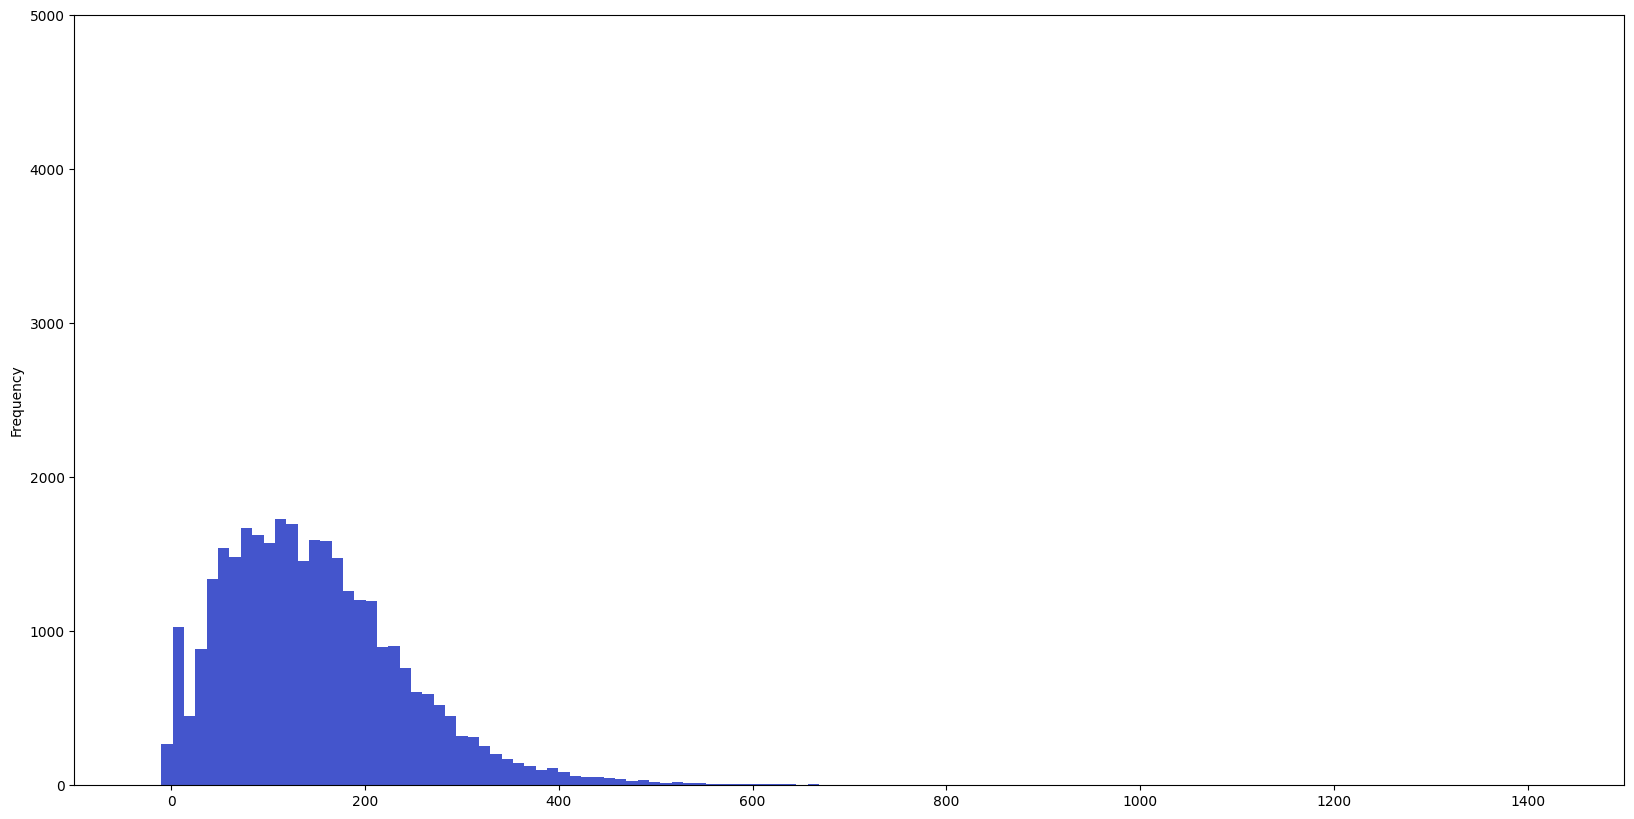

In [41]:
t["Różn Nawrocki"].plot(kind='hist', figsize=(20, 10), bins=100, xlim=(-100, 1500), ylim=(0,5000), color="#4455CC")

<Axes: ylabel='Frequency'>

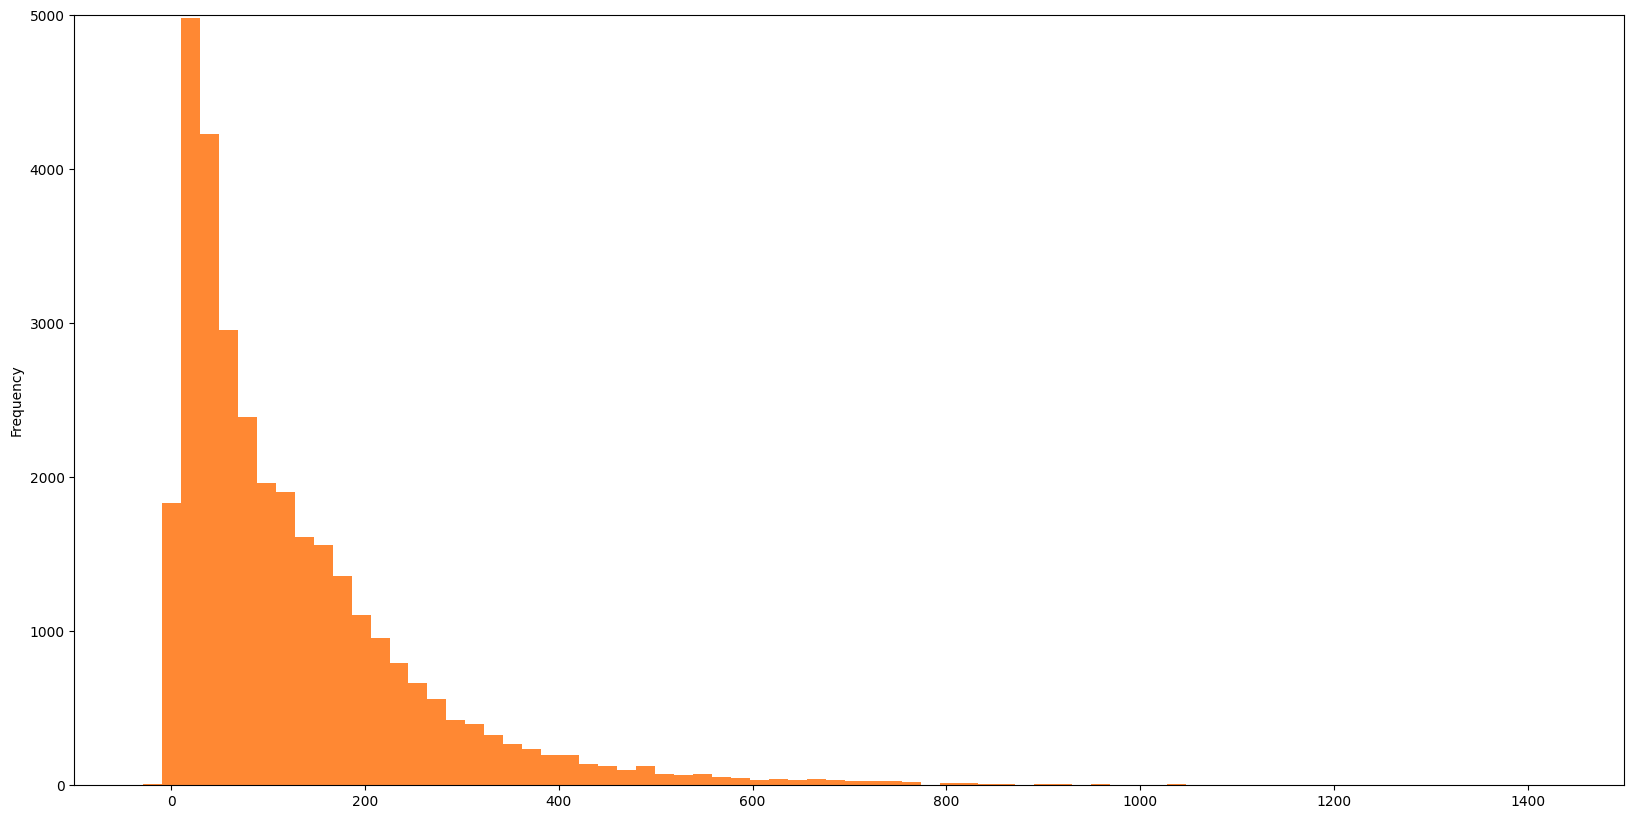

In [42]:
t["Różn Trzaskowski"].plot(kind='hist', figsize=(20, 10), bins=100, xlim=(-100, 1500), ylim=(0,5000), color="#FF8833")

Wow, nie spodziewałem się, że te histogramy będą tak różne... nawet po ujednoliceniu skali. Ciekawostka dla analityków politycznych :)

### W drugiej turze kandydat zdobywa mniejszą procentową liczbę głosów niż w pierwszej

In [43]:
rt_pmniej = t[t["Różn Proc Trzaskowski"] < 0].sort_values("Różn Proc Trzaskowski")
kn_pmniej = t[t["Różn Proc Nawrocki"] < 0].sort_values("Różn Proc Nawrocki")

In [44]:
len(rt_pmniej), len(kn_pmniej)

(219, 171)

Tutaj liczby komisji to 219 i 171 odpowiednio dla RT i KN.

Okazuje się, że są to w większości bardzo małe komisje, a poniżej wybieram tylko te, w których **łączna** liczba głosów (kart ważnych) wynosiła co najmniej 100.

In [45]:
rt_pmniej[rt_pmniej['Kart ważnych t2'] >= 100][[
        "Nr komisji", "Gmina", "Województwo", "Siedziba",
        "Proc Nawrocki t1", "Proc Nawrocki t2", "Różn Proc Nawrocki", "Różn Nawrocki",
        "Proc Trzaskowski t1", "Proc Trzaskowski t2","Różn Proc Trzaskowski", "Różn Trzaskowski"]]

Nr komisji                  Gmina          Województwo  \
17548           9  gm. Strzelce Opolskie             opolskie   
30433          47               m. Konin        wielkopolskie   
4466            2            gm. Biszcza            lubelskie   
17247           3             gm. Olesno             opolskie   
25936           1            gm. Sadowie       świętokrzyskie   
4069           25           m. Grudziądz   kujawsko-pomorskie   
22420          24               m. Sopot            pomorskie   
26717           8           gm. Płośnica  warmińsko-mazurskie   
11610          95              m. Kraków          małopolskie   
23686          17            gm. Gorzyce              śląskie   
15398        1148              Białołęka          mazowieckie   
9852           29        gm. Krzeszowice          małopolskie   
25160          35               m. Tychy              śląskie   
13441          19      gm. Góra Kalwaria          mazowieckie   
6442          197              m. Lublin            lubelskie   
10931           8       gm. Nowe Brzesko          małopolskie   
22043          17              m. Gdańsk            pomorskie   
17738           8             gm. Dydnia         podkarpackie   
25708          10        gm. Nowa Słupia       świętokrzyskie   
5914            2           gm. Rachanie            lubelskie   
5615           16           gm. Nałęczów            lubelskie   
26705          11           gm. Lidzbark  warmińsko-mazurskie   
10062           7          gm. Jodłownik          małopolskie   
14170           9          gm. Wierzbica          mazowieckie   

                                                Siedziba  Proc Nawrocki t1  \
17548  Przedszkole Publiczne nr 10, ul. Adama Asnyka ...          0.178631   
30433  Wojewódzki Szpital Zespolony im. dr. Romana Os...          0.435484   
4466   Gminny Ośrodek Kultury, Sportu i Rekreacji w B...          0.429185   
17247  Publiczna Szkoła Podstawowa Nr 3, klasa nr 3, ...          0.180962   
25936  Biblioteka - Ośrodek Kultury Gminy Sadowie, Sa...          0.414566   
4069   Zespół Placówek Młodzieżowych "Bursa", ul. gen...          0.219543   
22420  Sanatorium Uzdrowiskowe "Leśnik", ul. 23 Marca...          0.353383   
26717   Świetlica Wiejska, Rutkowice 33, 13-206 Płośnica          0.520833   
11610  Zespół Szkolno-Przedszkolny Nr 14, ul. Stawowa...          0.138942   
23686  Wojewódzki Ośrodek Lecznictwa Odwykowego i Zak...          0.289157   
15398  Stołeczne Centrum Opiekuńczo-Lecznicze sp. z o...          0.398496   
9852   Małopolski Szpital Rehabilitacyjny w Krzeszowi...          0.460993   
25160  Przedszkole Nr 17 w Tychach, ul. Lwa Tołstoja ...          0.216704   
13441  Dom Pomocy Społecznej w Górze Kalwarii, ul. Sz...          0.556962   
6442   Uniwersytecki Szpital Kliniczny Nr 1 w Lublini...          0.345455   
10931  Remiza Ochotniczej Straży Pożarnej w Majkowica...          0.625000   
22043  Szkoła Podstawowa Nr 62, Gdańsk ul. Kępna 38, ...          0.227494   
17738  Budynek byłej Szkoły Podstawowej w Obarzymie, ...          0.425676   
25708  Szkoła Podstawowa w Paprocicach, Paprocice 1, ...          0.504950   
5914     Remizo-Świetlica, Pawłówka 57B, 22-640 Rachanie          0.598361   
5615   Sanatorium Uzdrowiskowe Rolnik w Nałęczowie, u...          0.362832   
26705     Świetlica Wiejska, Klonowo 35, 13-230 Lidzbark          0.270677   
10062  Świetlica Wiejska, Góra Świętego Jana 85, 34-6...          0.628049   
14170  Remiza OSP w Wierzbicy-Kolonii, Wierzbica-Kolo...          0.472868   

       Proc Nawrocki t2  Różn Proc Nawrocki  Różn Nawrocki  \
17548          0.651017            0.472386            309   
30433          0.677966            0.242482             53   
4466           0.922917            0.493732            243   
17247          0.627586            0.446624            464   
25936          0.882022            0.467457            166   
4069           0.608696            0.389153            331

In [46]:
kn_pmniej[kn_pmniej['Kart ważnych t2'] >= 100][[
        "Nr komisji", "Gmina", "Województwo", "Siedziba",
        "Proc Trzaskowski t1", "Proc Trzaskowski t2","Różn Proc Trzaskowski", "Różn Trzaskowski",
        "Proc Nawrocki t1", "Proc Nawrocki t2", "Różn Proc Nawrocki", "Różn Nawrocki"]]

Nr komisji                       Gmina         Województwo  \
12616           1               gm. Magnuszew         mazowieckie   
2372            9              m. Ciechocinek  kujawsko-pomorskie   
9107          157                     m. Łódź             łódzkie   
26382           4                 gm. Staszów      świętokrzyskie   
5098            4                 gm. Bychawa           lubelskie   
25991          36  m. Ostrowiec Świętokrzyski      świętokrzyskie   
2268          310                  m. Wrocław        dolnośląskie   
444             9             m. Kudowa-Zdrój        dolnośląskie   
15487         113                     Mokotów         mazowieckie   
32100         196                 m. Szczecin  zachodniopomorskie   
16325         189                   zagranica                 NaN   
11256          22                 m. Zakopane         małopolskie   
16629         493                   zagranica                 NaN   

                                                Siedziba  Proc Trzaskowski t1  \
12616  Szkoła Podstawowa w Magnuszewie, ul. Bohaterów...             0.175292   
2372   Samodzielny Publiczny Zakład Opieki Zdrowotnej...             0.493827   
9107   Szkoła Podstawowa nr 160 im. Powstańców Śląski...             0.411628   
26382  Publiczna Szkoła Podstawowa nr 2 im. Ignacego ...             0.280943   
5098   Urząd Miejski (sala konferencyjna), ul. Marsza...             0.225888   
25991  Dom Pomocy Społecznej, ul. Grabowiecka 7, 27-4...             0.313559   
2268   Dolnośląskie Centrum Onkologii, Pulmonologii i...             0.452381   
444    SP ZOZ Sanatorium Uzdrowiskowe "Bristol" MSWiA...             0.441176   
15487  Szkoła Podstawowa Nr 205 im. Żołnierzy Powstan...             0.522491   
32100  S. P. Wojewódzki Szpital Zespolony, ul. Alfred...             0.426357   
16325  Meksyk, Calle Cracovia 40, Colonia San Ángel, ...             0.473451   
11256  Wojewódzki Szpital Rehabilitacyjny im. dr. Ste...             0.278481   
16629  Ho Chi Minh, 17 Đ. Lê Duẩn, District 1, Bến Ng...             0.377049   

       Proc Trzaskowski t2  Różn Proc Trzaskowski  Różn Trzaskowski  \
12616             0.707576               0.532284               362   
2372              0.658635               0.164807                44   
9107              0.882222               0.470594               220   
26382             0.632689               0.351746               217   
5098              0.614657               0.388769               171   
25991             0.650000               0.336441                41   
2268              0.621359               0.168978                26   
444               0.624309               0.183133                38   
15487             0.928796               0.406304               868   
32100             0.626087               0.199730                17   
16325             0.854902               0.381451               111   
11256             0.461039               0.182558                27   
16629             0.912162               0.535113                89   

       Proc Nawrocki t1  Proc Nawrocki t2  Różn Proc Nawrocki  Różn Nawrocki  
12616          0.475793          0.292424           -0.183369            -92  
2372           0.432099          0.341365           -0.090733            -20  
9107           0.200000          0.117778           -0.082222            -33  
26382          0.440079          0.367311           -0.072768            -15  
5098           0.441624          0.385343           -0.056282            -11  
25991          0.398305          0.350000           -0.048305             -5  
2268           0.416667          0.378641           -0.038026              4  
444            0.388235          0.375691           -0.012545              2  
15487          0.077278          0.071204           -0.006074              2  
32100          0.379845          0.373913           -0.005932             -6  
16325          0.150442          0.145098

### Eksport wyników

Łączę rekordy znalezione pierwszą i drugą metodą i eksportuję do plików dla zainteresowanych dalszą analizą.

In [47]:
rt = pd.concat([kn_mniej, kn_pmniej]).drop_duplicates().sort_values(['Różn Trzaskowski'])
kn = pd.concat([kn_mniej, kn_pmniej]).drop_duplicates().sort_values(['Różn Nawrocki'])

In [48]:
rt.to_csv('rt_mniej_utf8.csv', index=False, sep=',', encoding='UTF-8')
kn.to_csv('kn_mniej_utf8.csv', index=False, sep=',', encoding='UTF-8')

rt.to_excel('rt_mniej.xlsx')
kn.to_excel('kn_mniej.xlsx')

Pliki do pobrania stąd:  
https://dhont.info/jupyter/prez_2025/

## Z uwzględnieniem przepływu elektoratów

Gdyby naiwnie przyjąć, że wszystkie głosy „bardziej lewicowe” przechodzą na RT, a „bardziej prawicowe” na KN, wówczas komisji, w których zaobserwowano spadek poparcia między pierwszą a drugą turą będzie już bardzo dużo.

Nie świadczy to IMO o żadnych nieprawidłowościach, a jedynie o faktycznych przepływach tych elektoratów, które nie były pełne, jak zresztą potwierdzały badania.

Liczba komisji, w których liczba głosów na RT w drugiej turze była mniejsza niż na „blok rządowy + lewicowy” w pierwszej turze.

In [49]:
print((t["Różn Lewica"] < 0).sum())

3398


Liczba komisji, w których procent głosów na RT w drugiej turze był mniejszy niż na „blok rządowy + lewicowy” w pierwszej turze.

In [50]:
print((t["Różn Proc Lewica"] < 0).sum())

6992


Liczba komisji, w których liczba głosów na KN w drugiej turze była mniejsza niż na „blok antyrządowy + prawicowy” w pierwszej turze.

In [51]:
print((t["Różn Prawica"] < 0).sum())

12553


Liczba komisji, w których procent głosów na KN w drugiej turze był mniejszy niż na „blok antyrządowy + prawicowy” w pierwszej turze.

In [52]:
print((t["Różn Proc Prawica"] < 0).sum())

25090


Zbadajmy rozkład różnic bezwzględnych i procentowych.

Liczba dodatnia oznacza, że o tyle więcej głosów/procentów kandydat w 2t otrzymał, niż wiązany z nim blok w pierwszej turze.

Liczba ujemna, że w 2t otrzymał mniej głosów / procentów.

In [53]:
t[["Różn Lewica", "Różn Prawica"]].describe(percentiles=np.arange(0, 1, 0.1))

Różn Lewica  Różn Prawica
count  32143.000000  32143.000000
mean      34.663224      3.925551
std       54.003445     24.882971
min     -485.000000   -317.000000
0%      -485.000000   -317.000000
10%       -1.000000    -21.000000
20%        4.000000    -11.000000
30%        8.000000     -4.000000
40%       14.000000      0.000000
50%       20.000000      4.000000
60%       30.000000      8.000000
70%       41.000000     13.000000
80%       56.000000     19.000000
90%       80.000000     28.800000
max     1181.000000    639.000000

In [54]:
t[["Różn Proc Lewica", "Różn Proc Prawica"]].describe(percentiles=np.arange(0, 1, 0.1))

Różn Proc Lewica  Różn Proc Prawica
count      32138.000000       32138.000000
mean           0.020081          -0.020081
std            0.040715           0.040715
min           -0.750000          -0.600000
0%            -0.750000          -0.600000
10%           -0.015888          -0.054390
20%           -0.001860          -0.040985
30%            0.007055          -0.033046
40%            0.014146          -0.026706
50%            0.020563          -0.020563
60%            0.026706          -0.014146
70%            0.033046          -0.007055
80%            0.040985           0.001860
90%            0.054390           0.015888
max            0.600000           0.750000

Ponieważ każdego kandydata z pierwszej tury przyporządkowałem do jednej z grup, różnica po drugiej stronie jest lustrzanym odbiciem.

Uwaga, wykres jest w skali logarytmicznej.

<Axes: ylabel='Frequency'>

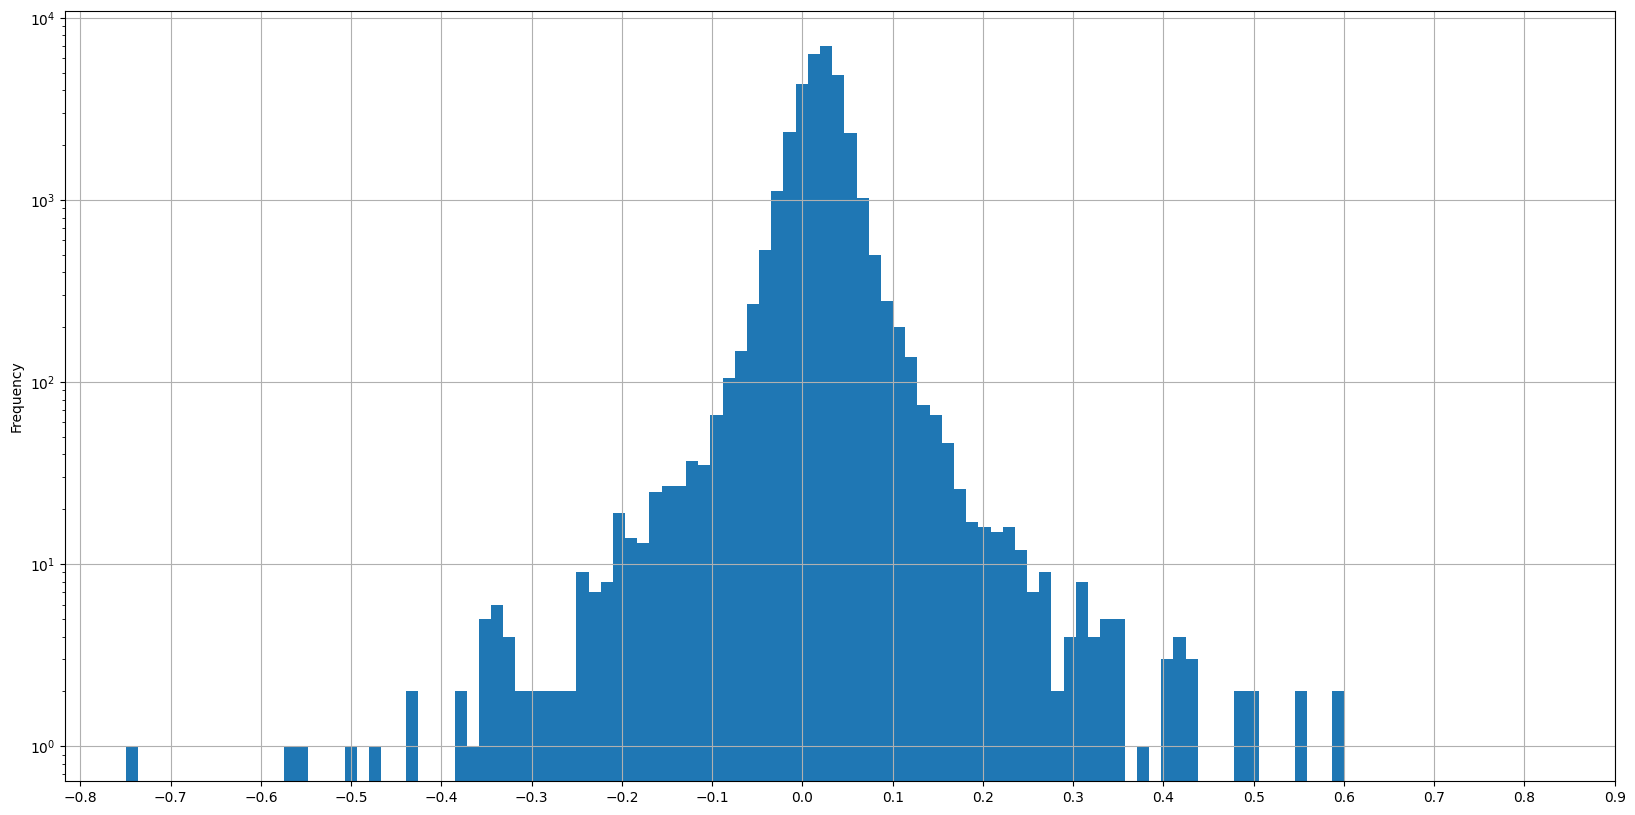

In [55]:
(t["Różn Proc Lewica"]).plot(kind='hist', figsize=(20,10), bins=100, logy=True, xticks=np.arange(-0.8, 1.0, 0.1), grid=True)

Zarówno średnia, jak i mediana oscylują około 2 punktów procentowych wzrostu poparcia RT względem sumy „lewicy” i 2 punktów procentowych spadku poparcia KN względem sumy „prawicy” z pierwszej tury. To informacja dla analityków sceny politycznej, a dla nas będzie to wartość domyślna tej zmiany.

In [56]:
srednia = t["Różn Proc Lewica"].mean()

Spróbujemy wyłowić teraz te komisje, gdzie ubytki procentów lub głosów między pierwszą a drugą turą były szczególnie duże.

Policzmy komisje, w których zmiana wyniku procentowego w dół była większa, niż przeciętne 2pp o 10, 20, 30, 40 i 50 pp.

In [57]:
for roznica in 0.1, 0.2, 0.3, 0.4, 0.5:
    print(roznica, (t["Różn Proc Lewica"] <= (-roznica + srednia)).sum())

0.1 393
0.2 92
0.3 30
0.4 9
0.5 4


In [58]:
for roznica in 0.1, 0.2, 0.3, 0.4, 0.5:
    print(roznica, (t["Różn Proc Prawica"] <= (-roznica - srednia)).sum())

0.1 417
0.2 94
0.3 32
0.4 13
0.5 4


Policzmy też komisje, gdzie bezwzględna liczba głosów na „bloki” spadła o więcej niż 100, 150, 200, 300 głosów.

In [59]:
for roznica in 100, 150, 200, 300:
    print(roznica, (t["Różn Lewica"] <= -roznica).sum())

100 8
150 6
200 2
300 1


In [60]:
for roznica in 100, 150, 200, 300:
    print(roznica, (t["Różn Prawica"] <= -roznica).sum())

100 57
150 13
200 8
300 1


Przyjmując odchylenie 20 punktów procentowych względem średniej za granicę „nietypowych przepływów”, zapisujemy rekordy, aby przyjrzeć się im bliżej.

In [61]:
lewica_mniej = t[(t["Różn Proc Lewica"] < (srednia-0.2))].copy()

In [62]:
prawica_mniej = t[(t["Różn Proc Prawica"] < (-srednia-0.2))].copy()

In [63]:
print(len(lewica_mniej), len(prawica_mniej))

92 94


Większość komisji to małe komisje w szpitalach. Około połowa z nich ma łączną liczbę kart ważnych ≤ 20:

In [64]:
print((lewica_mniej["Kart ważnych t2"] <= 20).sum(), (prawica_mniej["Kart ważnych t2"] <= 20).sum())

45 42


Policzymy jeszcze sumę tych „przepływów”. Poniższe liczby mają głównie umysłowić skalę, o jakiej mówimy – są to najwyżej pojedyncze tysiące głosów, a ponieważ „nietypowe przepływy” idą w obie strony, te liczby niwelują się i zostaje niezrównoważona różnica różnica rzędu kilkuset głosów.

Oczywiście konkretny wynik będzie zależał od zakreślania granic „nietypowego przepływu”. Ja ustaliłem zmianę o 20 punktów procentowych większą od średniej krajowej.

In [65]:
print(lewica_mniej["Różn Lewica"].sum(), prawica_mniej["Różn Prawica"].sum())

-1713 -1190


Łączna liczba kart w tych komisjach

In [66]:
print(lewica_mniej["Kart ważnych t2"].sum(), prawica_mniej["Kart ważnych t2"].sum())

8154 4830


In [67]:
print(lewica_mniej["Nawrocki t2"].sum() - lewica_mniej["Trzaskowski t2"].sum(),
      prawica_mniej["Trzaskowski t2"].sum() - prawica_mniej["Nawrocki t2"].sum())

2502 1675


Sortujemy dane według bezwzględnej różnicy głosów między wynikami „bloku” w pierwszej turze, a kandydata w drugiej turze. Największe spadki na górze.

Przypominam, że kolumna *Lewica t1* obejmuje głosy RT, a kolumna *Prawica t1* obejmuje głosy KN.

In [68]:
lewica_mniej.sort_values("Różn Lewica", inplace=True)
prawica_mniej.sort_values("Różn Prawica", inplace=True)

In [69]:
lewica_mniej.head(30)[["Nr komisji", "Gmina", "Województwo", "Siedziba",
                   "Nawrocki t1", "Prawica t1", "Nawrocki t2", "Różn Prawica", "Różn Proc Prawica",
                   "Trzaskowski t1", "Lewica t1", "Trzaskowski t2", "Różn Lewica", "Różn Proc Lewica"]]

Nr komisji                   Gmina         Województwo  \
11610          95               m. Kraków         małopolskie   
12863          13     m. Mińsk Mazowiecki         mazowieckie   
25160          35                m. Tychy             śląskie   
17247           3              gm. Olesno            opolskie   
17548           9   gm. Strzelce Opolskie            opolskie   
4069           25            m. Grudziądz  kujawsko-pomorskie   
27885          11             m. Chodzież       wielkopolskie   
4034          198            m. Bydgoszcz  kujawsko-pomorskie   
11947         432               m. Kraków         małopolskie   
26455          14          gm. Włoszczowa      świętokrzyskie   
7449            7           gm. Kleszczów             łódzkie   
7708            8             gm. Bielawy             łódzkie   
23686          17             gm. Gorzyce             śląskie   
8943           10               gm. Jeżów             łódzkie   
24149          61              m. Chorzów             śląskie   
19309          21            gm. Strzyżów        podkarpackie   
2852           22           gm. Gniewkowo  kujawsko-pomorskie   
7505           27                m. Kutno             łódzkie   
12207          10               gm. Sońsk         mazowieckie   
14040          23             gm. Pułtusk         mazowieckie   
17667          81                m. Opole            opolskie   
9273          323                 m. Łódź             łódzkie   
2353           64            m. Wałbrzych        dolnośląskie   
4291           66            m. Włocławek  kujawsko-pomorskie   
25935          21              gm. Ożarów      świętokrzyskie   
277            13                m. Jawor        dolnośląskie   
29864          19           gm. Szamotuły       wielkopolskie   
29065          44  m. Ostrów Wielkopolski       wielkopolskie   
2943           10                m. Lipno  kujawsko-pomorskie   
24085          79                m. Bytom             śląskie   

                                                Siedziba  Nawrocki t1  \
11610  Zespół Szkolno-Przedszkolny Nr 14, ul. Stawowa...          218   
12863  Przedszkole Miejskie Nr 6 w Mińsku Mazowieckim...          153   
25160  Przedszkole Nr 17 w Tychach, ul. Lwa Tołstoja ...          192   
17247  Publiczna Szkoła Podstawowa Nr 3, klasa nr 3, ...          173   
17548  Przedszkole Publiczne nr 10, ul. Adama Asnyka ...          107   
4069   Zespół Placówek Młodzieżowych "Bursa", ul. gen...          173   
27885  Budynek Szpitala w Chodzieży, ul. Strzelecka 3...           25   
4034   Wojewódzki Szpital Obserwacyjno-Zakaźny im. Ta...            8   
11947  Szpital Specjalistyczny im. J. Dietla w Krakow...           12   
26455  Zespół Opieki Zdrowotnej we Włoszczowie-Szpita...           28   
7449   Dom Pomocy Społecznej Św. Barbary, ul. Ogrodow...            5   
7708   Oddział Fizjoterapii i Rehabilitacji w Stanisł...           22   
23686  Wojewódzki Ośrodek Lecznictwa Odwykowego i Zak...           24   
8943   Dom Pomocy Społecznej w Dąbrowie, Dąbrowa 1, 9...           10   
24149  Ośrodek św. Florian Caritas Archidiecezji Kato...           11   
19309  Szpital Powiatowy w Strzyżowie, ul. 700-Lecia ...           19   
2852   Dom Pomocy Społecznej w Warzynie, Warzyn 1, 88...            8   
7505   Dom Pomocy Społecznej w Kutnie, ul. Bolesława ...            9   
12207  Niepubliczny Zespół Zakładów Opieki Zdrowotnej...           14   
14040  Dom Pomocy Społecznej "Pod Sosnami" w Pułtusku...            8   
17667  116 Szpital Wojskowy z Przychodnią SP ZOZ w Op...            7   
9273   Dom Pomocy Społecznej „Wyjątkowy Dom”, ul. Mun...            5   
2353   Dom Seniora - Sobięcin, ul. II Armii 4, 58-305...            0   
4291   Dom Pomocy Społecznej, ul. Nowomiejska 19, 87-...            7   
25935  Dom Pomocy Społecznej w Sobowie Filia w Suchod...            4   
277    Dom Pomocy Społecznej w Jaworze, pl. Seniora 3...            9   
29864  Samodzielny P

In [70]:
prawica_mniej.head(30)[["Nr komisji", "Gmina", "Województwo", "Siedziba",
                    "Trzaskowski t1", "Lewica t1", "Trzaskowski t2", "Różn Lewica", "Różn Proc Lewica",
                    "Nawrocki t1", "Prawica t1", "Nawrocki t2", "Różn Prawica", "Różn Proc Prawica"]]

Nr komisji             Gmina          Województwo  \
12616           1     gm. Magnuszew          mazowieckie   
16634         498         zagranica                  NaN   
26382           4       gm. Staszów       świętokrzyskie   
9107          157           m. Łódź              łódzkie   
5098            4       gm. Bychawa            lubelskie   
2863           11    gm. Inowrocław   kujawsko-pomorskie   
26602           4       gm. Sępopol  warmińsko-mazurskie   
16629         493         zagranica                  NaN   
30385          56         m. Kalisz        wielkopolskie   
7245           21       gm. Wschowa             lubuskie   
31274          11       gm. Polanów   zachodniopomorskie   
3017           13       gm. Wielgie   kujawsko-pomorskie   
23032           7         gm. Popów              śląskie   
26086          17       gm. Pińczów       świętokrzyskie   
16797          24     gm. Głubczyce             opolskie   
20603         180      m. Białystok            podlaskie   
27589          19       m. Szczytno  warmińsko-mazurskie   
30148          14       gm. Przemęt        wielkopolskie   
24088          82          m. Bytom              śląskie   
16796          23     gm. Głubczyce             opolskie   
22216         190         m. Gdańsk            pomorskie   
3601           20       gm. Tuchola   kujawsko-pomorskie   
4224          125          m. Toruń   kujawsko-pomorskie   
30990          21       gm. Gryfice   zachodniopomorskie   
27358          10     gm. Jeziorany  warmińsko-mazurskie   
4290           65      m. Włocławek   kujawsko-pomorskie   
19394          15         gm. Lesko         podkarpackie   
381            10  m. Kamienna Góra         dolnośląskie   
3613           11      m. Wąbrzeźno   kujawsko-pomorskie   
23556          19   gm. Zbrosławice              śląskie   

                                                Siedziba  Trzaskowski t1  \
12616  Szkoła Podstawowa w Magnuszewie, ul. Bohaterów...             105   
16634  Cassino, Via Marconi, Aula Pacis, 03043 Cassin...              91   
26382  Publiczna Szkoła Podstawowa nr 2 im. Ignacego ...             143   
9107   Szkoła Podstawowa nr 160 im. Powstańców Śląski...             177   
5098   Urząd Miejski (sala konferencyjna), ul. Marsza...              89   
2863   Świetlica w Miechowicach, Miechowice 34, 88-10...              39   
26602  Szkoła Podstawowa w Dzietrzychowie, Dzietrzych...              63   
16629  Ho Chi Minh, 17 Đ. Lê Duẩn, District 1, Bến Ng...              46   
30385  Oddział Zewnętrzny w Kaliszu Aresztu Śledczego...              16   
7245   Nowy Szpital we Wschowie, ul. ks. Kostki 33, 6...               8   
31274  Dom Pomocy Społecznej w Cetuniu, Cetuń 6, 76-0...               3   
3017   Świetlica Domu Pomocy Społecznej w Nowej Wsi, ...               3   
23032  Oddział Zewnętrzny w Wąsoszu Górnym Aresztu Śl...              21   
26086  Dom Pomocy Społecznej w Pińczowie, ul. Wesoła ...               0   
16797  Dom Pomocy Społecznej w Klisinie Filia w Radyn...               7   
20603  Samodzielny Publiczny ZOZ Wojewódzki Szpital Z...               1   
27589  Zespół Opieki Zdrowotnej w Szczytnie, ul. Mari...               4   
30148  Wielkopolskie Centrum Neuropsychiatryczne im. ...               8   
24088  Bytomskie Centrum Wsparcia, pl. Szpitalny 1, 4...               6   
16796  Dom Pomocy Społecznej w Klisinie, Klisino 100,...              10   
22216  SP ZOZ Ministerstwa Spraw Wewnętrznych i Admin...              11   
3601   Szpital Tucholski sp. z o.o., ul. Nowodworskie...               4   
4224   Wojewódzki Ośrodek Terapii Uzależnień i Współu...               5   
30990  Dom Pomocy Społecznej, ul. Kościuszki 71, 72-3...               6   
27358  Dom Pomocy Społecznej w Jezioranach, ul. Kajki...              17   
4290   Dom Pomocy Społecznej, ul. Dobrzyńska 102, 87-...               5   
19394  Zakład Karny w Uhercach Mineralnych-Oddział Ze...               9   
381    Powiatowe C

W przypadku spadku „prawicy” widać też wiele komisji zagranicznych.

Jeszcze raz powtarzam, że powiązanie kandydatów drugiej tury z „blokami” kandydatów w pierwszej jest bardzo dużym uproszczeniem i nie należy wyciągać pochopnych wniosków. Wcale nie jest powiedziane, że w każdej komisji wyborcy Mentzena głosowali w drugiej turze na Nawrockiego, a wyborcy Zandberga na Trzaskowskiego (przykładowo).

Zapisuję tak wybrane komisje do kolejnych plików w katalogu https://dhont.info/jupyter/prez_2025/

In [71]:
prawica_mniej.to_csv('prawica_mniej_utf8.csv', index=False, sep=',', encoding='UTF-8')
lewica_mniej.to_csv('lewica_mniej_utf8.csv', index=False, sep=',', encoding='UTF-8')

prawica_mniej.to_excel('prawica_mniej.xlsx')
lewica_mniej.to_excel('lewica_mniej.xlsx')

## Głosy nieważne

In [72]:
t[["Kart nieważnych t1", "Głosów nieważnych t1", "Głosów nieważnych X t1", "Głosów nieważnych Y t1",
   "Kart nieważnych t2", "Głosów nieważnych t2", "Głosów nieważnych X t2", "Głosów nieważnych Y t2"]].sum()

Kart nieważnych t1          2727
Głosów nieważnych t1       85813
Głosów nieważnych X t1     25574
Głosów nieważnych Y t1     60239
Kart nieważnych t2          1423
Głosów nieważnych t2      189289
Głosów nieważnych X t2    101841
Głosów nieważnych Y t2     87448
dtype: int64

Liczba kart nieważnych (bez pieczęci itp.) nie budzi kontrowersji. Komisje obwodowe za „kartę nieważną” uznają wszystko, co ludzie wrzucili do urn, np. kartę wydrukowaną samodzielnie w domu.

Kolumna `X` oznacza głosy nieważne z powodu więcej niż jednego znaku **X**, kolumna `Y` z podobu braku znaku **X**.

O ile głos typu `Y` w drugiej turze jest czymś normalnym (*żaden kandydat mi nie odpowiada*), to głosy typu `X` mogą budzić podejrzenie, bo kto szedłby specjalnie na wybory i stawiał dwa iksy?

Zbadam korelację procenta głosów nieważnych z powodu `X` z wynikiem procentowym kandydata po komisjach obwodowych.

In [73]:
tn = t.copy()

In [74]:
tn["Proc Głosów nieważnych t2"] = tn["Głosów nieważnych t2"] / tn["Kart ważnych t2"]
tn["Proc Głosów nieważnych X t2"] = tn["Głosów nieważnych X t2"] / tn["Kart ważnych t2"]
tn["Proc Głosów nieważnych Y t2"] = tn["Głosów nieważnych Y t2"] / tn["Kart ważnych t2"]

<Axes: xlabel='Proc Trzaskowski t2', ylabel='Proc Głosów nieważnych X t2'>

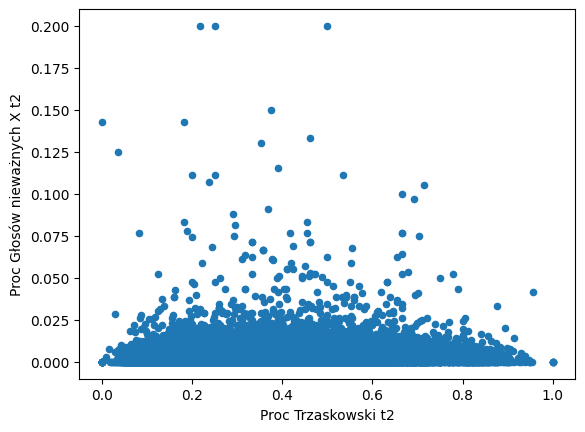

In [75]:
tn.plot(kind='scatter', x="Proc Trzaskowski t2", y="Proc Głosów nieważnych X t2")

In [76]:
tn["Proc Głosów nieważnych X t2"].corr(tn["Proc Trzaskowski t2"])

np.float64(0.08962301140112536)

In [77]:
tn["Proc Głosów nieważnych X t2"].corr(tn["Proc Nawrocki t2"])

np.float64(-0.08962301140112534)

Korelacja rzędu 0.09 jest nieistotna statystycznie, ale gdyby ktoś upierał się na jej podstawie wyciągać wnioski, to więcej tego typu nieważnych głosów było w komisjach, gdzie lepsze wyniki osiągnął RT.

Możemy też wyłowić te komisje, w których udział głosów nieważnych był szczególnie duży. Procentowo...

In [78]:
tn.sort_values("Proc Głosów nieważnych X t2", ascending=False)[["Nr komisji", "Gmina", "Województwo", "Siedziba",
                                                                "Kart ważnych t2", "Głosów nieważnych t2", "Głosów nieważnych X t2",
                                                                "Trzaskowski t1", "Trzaskowski t2", "Nawrocki t1", "Nawrocki t2"]].head(30)

Nr komisji                  Gmina         Województwo  \
30712         245              m. Poznań       wielkopolskie   
19928          12            m. Hajnówka           podlaskie   
25841           7     gm. Słupia Konecka      świętokrzyskie   
13562           7             gm. Bielsk         mazowieckie   
18650          13             gm. Jeżowe        podkarpackie   
8299            6          gm. Przedbórz             łódzkie   
2353           64           m. Wałbrzych        dolnośląskie   
19470          35            m. Przemyśl        podkarpackie   
17941          12             gm. Laszki        podkarpackie   
29980          26               gm. Śrem       wielkopolskie   
25350           8             gm. Gnojno      świętokrzyskie   
7514            7             gm. Bedlno             łódzkie   
2564           26           gm. Koronowo  kujawsko-pomorskie   
25375          10        gm. Solec-Zdrój      świętokrzyskie   
4037          201           m. Bydgoszcz  kujawsko-pomorskie   
1683           23  gm. Ząbkowice Śląskie        dolnośląskie   
25273          81              m. Zabrze             śląskie   
19112           5           gm. Bukowsko        podkarpackie   
26332          10            gm. Bogoria      świętokrzyskie   
30112          14              gm. Skoki       wielkopolskie   
18523          33              m. Mielec        podkarpackie   
21901          20           m. Wejherowo           pomorskie   
13880          13           m. Przasnysz         mazowieckie   
22449          28              m. Będzin             śląskie   
2281          323             m. Wrocław        dolnośląskie   
30698         231              m. Poznań       wielkopolskie   
8459            8            gm. Złoczew             łódzkie   
14441           7              gm. Repki         mazowieckie   
4027          191           m. Bydgoszcz  kujawsko-pomorskie   
31372          25          gm. Myślibórz  zachodniopomorskie   

                                                Siedziba  Kart ważnych t2  \
30712  Zakład Opiekuńczo-Leczniczy Wielospecjalistycz...                5   
19928  Zakład Pielęgnacyjno-Opiekuńczy Samodzielnego ...                5   
25841  Dom Pomocy Społecznej "Etola" w Rudzie Pilczyc...               30   
13562   Dom Pomocy Społecznej, Goślice 66, 09-230 Bielsk               20   
18650  Dom Pomocy Społecznej "u Aniołów", Jeżowe 728,...                7   
8299   Dom Pomocy Społecznej „Family”-Niepubliczny Za...               14   
2353   Dom Seniora - Sobięcin, ul. II Armii 4, 58-305...               15   
19470  Dom Pomocy Społecznej im. Św. Brata Alberta, u...               23   
17941  Dom Pomocy Społecznej w Wysocku, Wysocko 2B, 3...               64   
29980  Dom Pomocy Społecznej w Śremie, ul. Farna 16, ...               26   
25350  Dom Pomocy Społecznej w Gnojnie, Gnojno 118, 2...               18   
7514   Dom Pomocy Społecznej w Wojszycach, Wojszyce 4...               63   
2564   Dom Pomocy Społecznej w Koronowie, ul. Paderew...               18   
25375  Dom Pomocy Społecznej w Zborowie, Zborów ul. P...               28   
4037   Zakład Opiekuńczo-Leczniczy w Bydgoszczy, ul. ...               19   
1683   Dom Pomocy Społecznej dla osób przewlekle psyc...               10   
25273  Dom Pomocy Społecznej "Słoneczny Dom", ul. Knu...               31   
19112  Wiejski Dom Spotkań Kulturalnych w Woli Piotro...              132   
26332  Dom Pomocy Społecznej w Pęcławicach Górnych, P...               34   
30112  Dom Opieki Nasz Dom, Jabłkowo 19, 62-285 Popow...               12   
18523  Całodobowy Dom Opieki w Mielcu, ul. Partyzantó...               12   
21901  Dom Pomocy Społecznej, ul. św. Jacka 14, 84-20...               49   
13880  Dom Pomocy Społecznej, ul. Ruda 1, 06-300 Prza...               64   
22449  Dom Pomocy Społecznej, ul. Fryderyka Chopina 1...               26   
2281   Dom Pomocy Społecznej "Arka" i Dom Pomocy Społ...               13   
30698  Szpital Św. R

Większość z nich to komisje bardzo małe. Suma głosów nieważnych w komisjach o procencie nieważnych głosów ≥ 5% wynosi ledwie 1370.

In [79]:
tn.loc[tn["Proc Głosów nieważnych t2"] >= 0.05, "Głosów nieważnych t2"].sum()

np.int64(1370)

Więc szukamy tych o największej wartości bezwzględnej.

In [80]:
tn.sort_values("Głosów nieważnych X t2", ascending=False)[["Nr komisji", "Gmina", "Województwo", "Siedziba",
                                                           "Kart ważnych t2", "Głosów nieważnych t2", "Głosów nieważnych X t2", "Proc Głosów nieważnych X t2",
                                                           "Trzaskowski t1", "Trzaskowski t2", "Nawrocki t1", "Nawrocki t2"]].head(50)

Nr komisji             Gmina    Województwo  \
30503          36         m. Poznań  wielkopolskie   
22097          71         m. Gdańsk      pomorskie   
19525          51        m. Rzeszów   podkarpackie   
16031         663            Włochy    mazowieckie   
15513         139           Mokotów    mazowieckie   
22114          88         m. Gdańsk      pomorskie   
15861         703             Ursus    mazowieckie   
15473          99           Mokotów    mazowieckie   
30576         109         m. Poznań  wielkopolskie   
19489          15        m. Rzeszów   podkarpackie   
22440          19         m. Będzin        śląskie   
6348          103         m. Lublin      lubelskie   
22079          53         m. Gdańsk      pomorskie   
9146          196           m. Łódź        łódzkie   
22150         124         m. Gdańsk      pomorskie   
23965          36  m. Bielsko-Biała        śląskie   
22035           9         m. Gdańsk      pomorskie   
22078          52         m. Gdańsk      pomorskie   
30650         183         m. Poznań  wielkopolskie   
11702         187         m. Kraków    małopolskie   
21465           6      gm. Kosakowo      pomorskie   
22096          70         m. Gdańsk      pomorskie   
16123         343          Żoliborz    mazowieckie   
15325         755            Bemowo    mazowieckie   
15918         621           Ursynów    mazowieckie   
15379         883         Białołęka    mazowieckie   
15830         945          Targówek    mazowieckie   
11792         277         m. Kraków    małopolskie   
16064         280              Wola    mazowieckie   
15819         934          Targówek    mazowieckie   
15422         792           Bielany    mazowieckie   
15608         404    Praga-Południe    mazowieckie   
8827           30         m. Zgierz        łódzkie   
19490          16        m. Rzeszów   podkarpackie   
30575         108         m. Poznań  wielkopolskie   
15870         573           Ursynów    mazowieckie   
9017           67           m. Łódź        łódzkie   
11636         121         m. Kraków    małopolskie   
11785         270         m. Kraków    małopolskie   
22158         132         m. Gdańsk      pomorskie   
11849         334         m. Kraków    małopolskie   
7412           13      m. Bełchatów        łódzkie   
15990        1009            Wesoła    mazowieckie   
2245          287        m. Wrocław   dolnośląskie   
22187         161         m. Gdańsk      pomorskie   
9008           58           m. Łódź        łódzkie   
683             9          m. Lubin   dolnośląskie   
11599          84         m. Kraków    małopolskie   
30639         172         m. Poznań  wielkopolskie   
11743         228         m. Kraków    małopolskie   

                                                Siedziba  Kart ważnych t2  \
30503  Szkoła Podstawowa Specjalna nr 106, ul. Klemen...             3192   
22097  Przedszkole Nr 82, Gdańsk ul. Damroki 137, 80-...             2716   
19525  Szkoła Podstawowa Nr 24, ul. Piotra Czajkowski...             2387   
16031   Ratusz, al. Aleja Krakowska 257, 02-133 Warszawa             3222   
15513  Zespół Szkolno-Przedszkolny Nr 1, ul. Gościnie...             2694   
22114  Zespół Szkół Ogólnokształcących Nr 12, Gdańsk ...             2869   
15861  Szkoła Podstawowa nr 2, ul. Orłów Piastowskich...             2647   
15473  Przedszkole Nr 330 "Pod Modrzewiem", al. Aleja...             2143   
30576  Politechnika Poznańska, ul. Jana Pawła II 28, ...             4005   
19489  Zespół Szkół Technicznych, ul. Adama Matuszcza...             2511   
22440  Filia Ośrodka Kultury, pl. plac Skarbińskich 1...             1496   
6348   Zespół Szkół nr 12, ul. Sławinkowska 50, 20-81...             1758   
22079  Morska Szkoła Podstawowa Gdańsk-Południe, Gdań...             2709   
9146   Szkoła Podstawowa nr 169 im. Marii Dąbrowskiej...             2654   
22150  Zespół Szkół Ogólnokształcących Nr 1, Gdańsk u...             1498   
23965  Szkoła Podsta

Komisje, w których liczba głosów nieważnych z powodu podwójnego X przekroczyła 2% kart, a jednocześnie wynosiła co najmniej 5 sztuk → 61 takich komisji.
To zapiszę do kolejnego pliku

In [81]:
znalezione = tn[(tn["Proc Głosów nieważnych X t2"] >= 0.02) & (tn["Głosów nieważnych X t2"] >= 5)]

In [82]:
len(znalezione)

61

In [83]:
zn = znalezione.sort_values("Głosów nieważnych X t2", ascending=False)
zn[["Nr komisji", "Gmina", "Województwo", "Siedziba",
    "Kart ważnych t2", "Głosów nieważnych t2", "Głosów nieważnych X t2",
    "Trzaskowski t1", "Trzaskowski t2", "Nawrocki t1", "Nawrocki t2"]].head(30)

Nr komisji                    Gmina         Województwo  \
8827           30                m. Zgierz             łódzkie   
683             9                 m. Lubin        dolnośląskie   
11944         429                m. Kraków         małopolskie   
6462          217                m. Lublin           lubelskie   
4390            1              gm. Rossosz           lubelskie   
11491          16            gm. Wieliczka         małopolskie   
21812           4              gm. Pelplin           pomorskie   
17322           4         gm. Komprachcice            opolskie   
19112           5             gm. Bukowsko        podkarpackie   
1655            1           gm. Stoszowice        dolnośląskie   
3048           17              gm. Mogilno  kujawsko-pomorskie   
7623            4           gm. Wodzierady             łódzkie   
1324            3              gm. Prusice        dolnośląskie   
17941          12               gm. Laszki        podkarpackie   
17039          19             gm. Namysłów            opolskie   
3657            3      gm. Brześć Kujawski  kujawsko-pomorskie   
21908           6             gm. Choczewo           pomorskie   
10796          11              m. Oświęcim         małopolskie   
13417          21             gm. Wiązowna         mazowieckie   
21996           2  gm. Mikołajki Pomorskie           pomorskie   
22865           8             gm. Poczesna             śląskie   
916            10             gm. Oleśnica        dolnośląskie   
749             6                gm. Rudna        dolnośląskie   
28051           7          gm. Czerniejewo       wielkopolskie   
4574            3             gm. Dorohusk           lubelskie   
7514            7               gm. Bedlno             łódzkie   
6961            7            gm. Zbąszynek            lubuskie   
7527            9          gm. Krośniewice             łódzkie   
653             8                gm. Leśna        dolnośląskie   
30723         256                m. Poznań       wielkopolskie   

                                                Siedziba  Kart ważnych t2  \
8827   Szkoła Podstawowa Nr 1 z Oddziałami Integracyj...             1018   
683    II Liceum Ogólnokształcące, ul. Aleja Niepodle...              610   
11944  Dom Studencki Nr 1 Olimp w Krakowie, ul. Józef...              773   
6462   Areszt Śledczy w Lublinie, ul. Południowa 5, 2...              587   
4390   Hala Sportowa w Rossoszu, ul. Lubelska 37, 21-...              581   
11491  Szkoła Podstawowa w Podstolicach, Podstolice 2...              668   
21812  Szkoła Podstawowa Nr 2 w Pelplinie, ul. Kościu...              564   
17322  Publiczna Szkoła Podstawowa w Domecku, Domecko...              552   
19112  Wiejski Dom Spotkań Kulturalnych w Woli Piotro...              132   
1655   Szkoła Podstawowa w Budzowie z filią w Grodzis...              470   
3048   Zespół Szkolno-Przedszkolny w Mogilnie, ul. Po...              437   
7623   Świetlica wiejska w Leśnicy, Leśnica 46, 98-10...              189   
1324   Świetlica Wiejska w Piotrkowicach, Piotrkowice...              410   
17941  Dom Pomocy Społecznej w Wysocku, Wysocko 2B, 3...               64   
17039  Zespół Szkolno-Przedszkolny, Smarchowice Wielk...              307   
3657   Brzeskie Centrum Kultury i Historii „Wahadło”,...              389   
21908  Świetlica wiejska, Sasino ul. Brukowa 3, 84-21...              394   
10796  Przedszkole Miejskie Nr 15, ul. Budowlanych 43...              336   
13417  Świetlica w Woli Duckiej, Wola Ducka ul. Słone...              311   
21996  Gminne Centrum Kulturalno Biblioteczne w Mikoł...              317   
22865  Świetlica wiejska w Nowej Wsi, Nowa Wieś ul. C...              321   
916    Powiatowy Dom Pomocy Społecznej w Ostrowinie, ...              345   
749    Świetlica Wiejska, Chobienia rynek Rynek 6, 59...              240   
28051  Świetlica Wiejska w Szczytnikach Czerniejewski...              318   
4574   Szkoła Podstawowa, Świerże u

In [84]:
zn.to_csv('duzo_niewaznych.xlsx')
zn.to_excel('duzo_niewaznych.xlsx')

### Wzrost liczby wyborców t1 → t2

Pojawił się jeszcze wątek dodatkowych wyborców uprawnionych do głosowania, których przybyło w drugiej turze. 
Obstawiam, że chodzi o komisje zagraniczne, do których mogą zapisywać się osoby z obywatelstwem polskim nie mieszkające w Polsce.
Ale sprawdźmy to.

In [85]:
rozn_upr = t["Uprawnionych t2"] - t["Uprawnionych t1"]

In [86]:
print(rozn_upr.sum())

111331


In [87]:
tu = t.sort_values("Nr komisji", key=lambda _: rozn_upr)[["Nr komisji", "Gmina", "Siedziba", "Uprawnionych t1", "Uprawnionych t2", "Nawrocki t2", "Trzaskowski t2"]]

Co ciekawe, są róœnież komisje z istotnym spadkiem liczby wyborców. Natomiast wzrosty – bez zaskoczenia – dotyczą głównie zagranicy i miejscowości wypoczynkowych.

In [88]:
tu.head(30)

Nr komisji                  Gmina  \
2092          134             m. Wrocław   
24410          55             m. Gliwice   
9126          176                m. Łódź   
13810          27            m. Pruszków   
21512           1               m. Ustka   
27535           4             gm. Orzysz   
15559         205                 Ochota   
9556           30           gm. Chrzanów   
22670           8             gm. Brenna   
29243           3                m. Piła   
9181          231                m. Łódź   
11247          13            m. Zakopane   
24609          51            m. Katowice   
27532           1             gm. Orzysz   
11944         429              m. Kraków   
16025         657                 Włochy   
12986          10               m. Mława   
30844          11  gm. Drawsko Pomorskie   
15768          30            Śródmieście   
1424            4      m. Szczawno-Zdrój   
9191          241                m. Łódź   
9165          215                m. Łódź   
16634         498              zagranica   
22651          10              m. Ustroń   
6677            2         gm. Skwierzyna   
16060         276                   Wola   
19103          22               m. Sanok   
5207            9              gm. Wólka   
29220           3         gm. Ostrzeszów   
15570         216                 Ochota   

                                                Siedziba  Uprawnionych t1  \
2092   Liceum Ogólnokształcące nr IV, ul. Stacha Świs...             1937   
24410  Szkoła Podstawowa z Oddziałami Integracyjnymi ...             1399   
9126   Integracyjna Szkoła Podstawowa nr 67 im. Janus...             1667   
13810  Mazowieckie Specjalistyczne Centrum Zdrowia im...              540   
21512  Szkoła Podstawowa nr 1, ul. Darłowska 18, 76-2...             1324   
27535  Świetlica wiejska w Wierzbinach, Wierzbiny 26A...              938   
15559  Szkoła Podstawowa nr 97, ul. Spiska 1, 02-302 ...             1453   
9556   Szpital Powiatowy w Chrzanowie, ul. Topolowa 1...              435   
22670  Szkoła Podstawowa Nr 2 w Brennej, ul. Bukowa 4...             1051   
29243  I Liceum Ogólnokształcące im. Marii Skłodowski...             2467   
9181   XLVII Liceum Ogólnokształcące im. Stanisława S...             2024   
11247  Szkoła Podstawowa Nr 4, ul. Janosówka 15B, 34-...             1788   
24609  Szkoła Podstawowa nr 53, ul. Szopienicka 58A, ...             1441   
27532  Zespół szkolno-przedszkolny w Orzyszu (mały bu...             1595   
11944  Dom Studencki Nr 1 Olimp w Krakowie, ul. Józef...              947   
16025  CLIX Liceum Ogólnokształcące, ul. Solipska 17/...             1502   
12986  Zespół Szkół Nr 1, ul. Zuzanny Morawskiej 29, ...             1743   
30844  Szkoła Podstawowa w Mielenku Drawskim, Mielenk...              820   
15768    Przedszkole nr 44, ul. Ludna 8, 00-406 Warszawa             2715   
1424   Miejska Biblioteka Publiczna „Zdrojoteka” w Sz...             1068   
9191   Szkoła Podstawowa nr 12 im. Mariana Batki, ul....             2000   
9165   Szkoła Podstawowa nr 23 im. Marii Bohuszewiczó...             1782   
16634  Cassino, Via Marconi, Aula Pacis, 03043 Cassin...              315   
22651  Budynek Sanatorium i Szpitala Uzdrowiskowego „...             1245   
6677   Ośrodek Sportu i Rekreacji (świetlica) w Skwie...             1344   
16060  Szkoła Podstawowa nr 132, ul. Grabowska 1, 01-...             2795   
19103  Samodzielny Publiczny Zespół Opieki Zdrowotnej...              321   
5207   Gminna Biblioteka Publiczna-Filia Turka, ul. K...             2648   
29220  I Liceum Ogólnokształcące, ul. Zamkowa 21, 63-...             1993   
15570  Centrum Kształcenia Ustawicznego Nr 2, ul. Szc...             1412   

       Uprawnionych t2  Nawrocki t2  Trzaskowski t2  
2092              1395          545             837  
24410              952          517             422  
9126              1351          416             868  
13810              224          114   

In [89]:
tu.tail(50)

Nr komisji              Gmina  \
16574         438          zagranica   
16623         487          zagranica   
16374         238          zagranica   
16252         116          zagranica   
31521           6      gm. Postomino   
16187          51          zagranica   
16176          40          zagranica   
21638          14          gm. Ustka   
16063         279               Wola   
16412         276          zagranica   
16411         275          zagranica   
16171          35          zagranica   
31259           5         gm. Mielno   
16232          96          zagranica   
16519         383          zagranica   
16639         503          zagranica   
16368         232          zagranica   
16344         208          zagranica   
16212          76          zagranica   
31009           2          gm. Rewal   
16567         431          zagranica   
16137           1          zagranica   
31008           1          gm. Rewal   
31010           3          gm. Rewal   
16204          68          zagranica   
21315           1            m. Łeba   
31257           3         gm. Mielno   
16408         272          zagranica   
16398         262          zagranica   
16373         237          zagranica   
16637         501          zagranica   
16192          56          zagranica   
16384         248          zagranica   
16632         496          zagranica   
16638         502          zagranica   
16185          49          zagranica   
16635         499          zagranica   
31206           5      gm. Kołobrzeg   
21396           1  m. Krynica Morska   
16513         377          zagranica   
16254         118          zagranica   
21438           1      gm. Jastarnia   
16188          52          zagranica   
16190          54          zagranica   
16642         506          zagranica   
16321         185          zagranica   
16234          98          zagranica   
16233          97          zagranica   
16631         495          zagranica   
16514         378          zagranica   

                                                Siedziba  Uprawnionych t1  \
16574  Reading, 81 London Road, RG1 5BY Reading, Read...             2208   
16623  Sheffield, 93 Broomspring Lane, S10 2FB Sheffi...             2209   
16374  Dortmund I, Märkische Straße 120, 44141 Dortmu...             1693   
16252  Alicante II, Avenida de Elche 3, 03008 Alicant...              991   
31521  Szkoła Podstawowa w Jarosławcu, ul. Bałtycka 6...             1378   
16187  Split, Kliška 29, 21000 Split, Split, Republik...              559   
16176  Nesebyr, Mladost 62, 8230 Nesebyr, Nesebyr, Re...              402   
21638  Świetlica Wiejska w Rowach, ul. Kościelna 2a, ...              905   
16063  Przedszkole Nr 426, ul. Boguszewska 4, 01-250 ...             1960   
16412  Moss, Dronningensgate 27, 1530 Moss, Moss, Kró...             1776   
16411  Lillestrøm, Kjerulfsgate 38, 2000 Lillestrøm, ...             2076   
16171  Gandawa, Kortrijksesteenweg 1025, 9051 Gent, G...             2533   
31259  Szkoła Podstawowa im. Straży Granicznej w Sarb...             1566   
16232  Ateny, Chryssanthemon 22, 154 52 Paleo Psychik...             1285   
16519  Budapeszt, Városligeti fasor 16., 1068 Budapes...             1440   
16639  Mediolan II, Via Monte Rosa 6, 20149 Milano, M...             1284   
16368  Kolonia I, Im MediaPark 5C, 50670 Köln, Koloni...             1947   
16344  Brunssum, Schinvelderstraat 19A, 6441 TE Bruns...             2482   
16212  Paryż I, 57, rue Saint Dominique, 75007 Paris,...             2313   
31009  Sala Wystawiennicza w Rewalu, ul. Słowackiego ...             1322   
16567  Northampton, St Lawrence House, Duke Street, N...             2176   
16137  Tirana, Rruga e Bogdanëve 50, Tiranë 1001, Tir...              304   
31008  Kompleks Rekreacyjno-Sportowy, ul. Moniuszki 8...             1701   
31010  Kompleks sportowo-rekreacyjny, ul. Leśna 1, 72...             1811   
16204  Hurghada, Km 20 Hurghada - Safaga 